# Data Exploration

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

import scipy.stats

import acquire
import prepare

In [2]:
df_iris = prepare.prep_iris(acquire.get_iris_data())

In [3]:
df_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encoded
0,setosa,5.1,3.5,1.4,0.2,0
1,setosa,4.9,3.0,1.4,0.2,0
2,setosa,4.7,3.2,1.3,0.2,0
3,setosa,4.6,3.1,1.5,0.2,0
4,setosa,5.0,3.6,1.4,0.2,0


In [4]:
# Split data into train (70%) & test (30%) samples. 
# You should end with 2 data frames: train_df and test_df 

train_df, test_df = train_test_split(df_iris, train_size=.7, random_state=123)


In [5]:
train_df.shape

(105, 6)

In [6]:
test_df.shape

(45, 6)

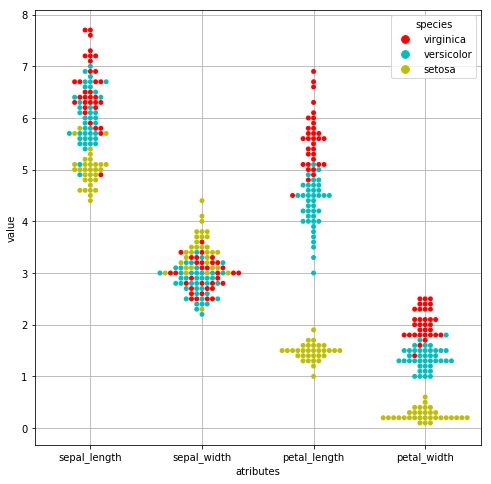

In [7]:
# Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). 
# The y-axis is the value of the variable. 
# Use color to represent species as another dimension. 
# Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. 
# What are your takeaways from this visualization?

plt.figure(figsize=(8,8))

df_melt = pd.melt(train_df[['sepal_length','sepal_width','petal_length', 'petal_width', 'species']], "species", var_name="atributes")

sns.swarmplot(x='atributes' , y="value", hue="species",
              palette=["r", "c", "y"], data=df_melt)

plt.grid(b = True , which = "major")


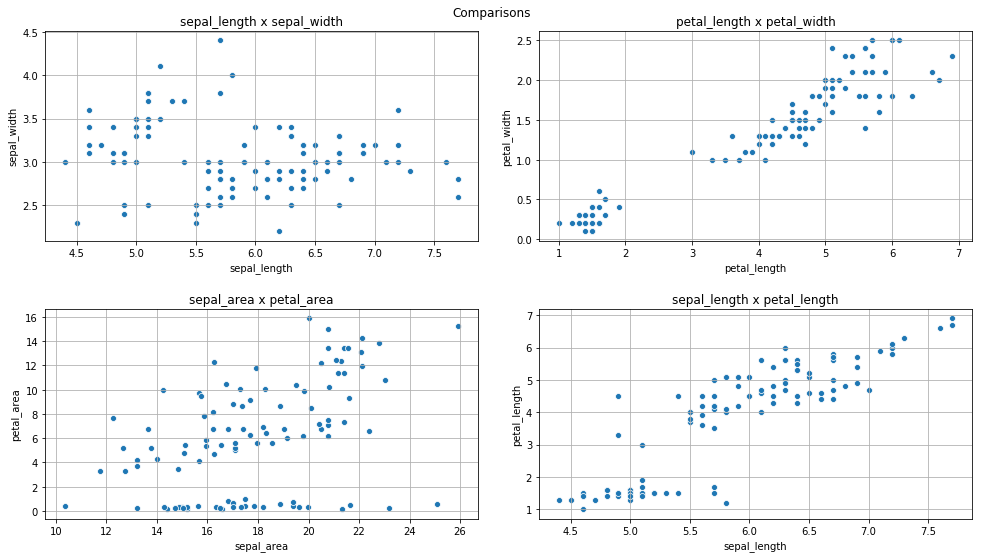

In [8]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots

# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length
# Make your figure size 14 x 8. 
# What are your takeaways?

train_df['sepal_area'] = train_df.sepal_length * train_df.sepal_width 
train_df['petal_area'] = train_df.petal_length * train_df.petal_width

plt.figure(figsize=(14,8))
plt.suptitle('Comparisons')

plt.subplot(2,2,1)
sns.scatterplot(x='sepal_length', y='sepal_width', data=train_df)
plt.title('sepal_length x sepal_width')
plt.grid(b = True , which = "major")

plt.subplot(2,2,2)
sns.scatterplot(x='petal_length', y='petal_width', data=train_df)
plt.title('petal_length x petal_width')
plt.grid(b = True , which = "major")

plt.subplot(2,2,3)
sns.scatterplot(x='sepal_area', y='petal_area', data=train_df)
plt.title('sepal_area x petal_area')
plt.grid(b = True , which = "major")

plt.subplot(2,2,4)
sns.scatterplot(x=train_df.sepal_length, y=train_df.petal_length, data=train_df)
plt.title('sepal_length x petal_length')
plt.grid(b = True , which = "major")

plt.tight_layout(pad=2)


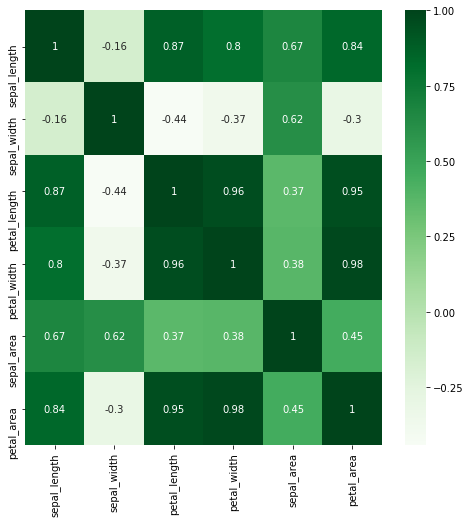

In [9]:
# Create a heatmap of each variable layering correlation coefficient on top.

plt.figure(figsize=(8,8))
sns.heatmap(data=train_df.drop(['species_encoded'], axis=1).corr(), annot=True, cmap='Greens')

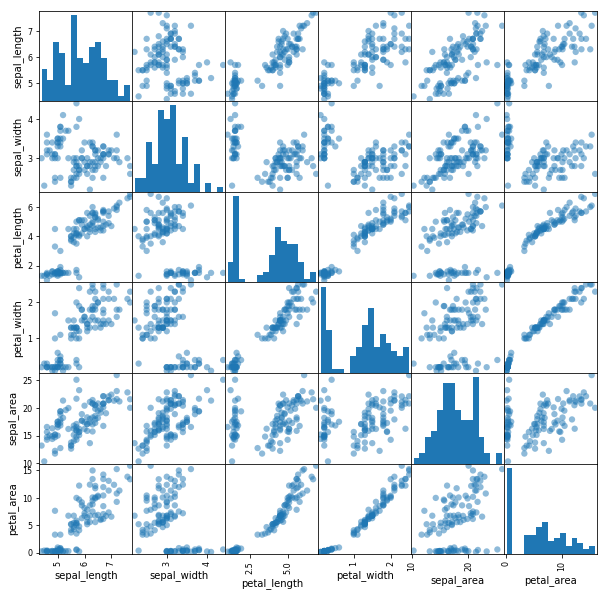

In [10]:
# Create a scatter matrix visualizing the interaction of each variable


cmap = cm.get_cmap('Greens')
scatter = pd.scatter_matrix(
    train_df.drop(['species_encoded'], axis=1), marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(10,10), cmap=cmap)

Is the sepal length significantly different in virginica than versicolor? 
Run an experiment to test this.

- must include null hypothesis, alternative hyp, t-test, results, summary
- H0: the difference in sepal length between virginica and versicolor is insignificant.
- Ha: the difference in sepal length between virginica and versicolor is substantial.
- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somwhat normally distributed.

In [11]:
virginica = train_df[train_df.species == 'virginica']
versicolor = train_df[train_df.species == 'versicolor']

scipy.stats.ttest_ind(virginica.sepal_length, versicolor.sepal_length)

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

P-value is under 0.05 so there is a difference, we could use both.

In [12]:
titanic_df = acquire.get_titanic_data()

In [13]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [14]:
titanic_df.drop('deck', axis=1, inplace=True)

In [15]:
train_titanic, test_titanic = train_test_split(titanic_df, train_size=.7, stratify=titanic_df.survived, random_state=123)


In [16]:
train_titanic.shape

(623, 12)

In [17]:
test_titanic.shape

(268, 12)

In [18]:
train_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
199,199,0,2,female,24.0,0,0,13.000,S,Second,Southampton,1
468,468,0,3,male,NaN,0,0,7.725,Q,Third,Queenstown,1
198,198,1,3,female,NaN,0,0,7.750,Q,Third,Queenstown,1
574,574,0,3,male,16.0,0,0,8.050,S,Third,Southampton,1
776,776,0,3,male,NaN,0,0,7.750,Q,Third,Queenstown,1


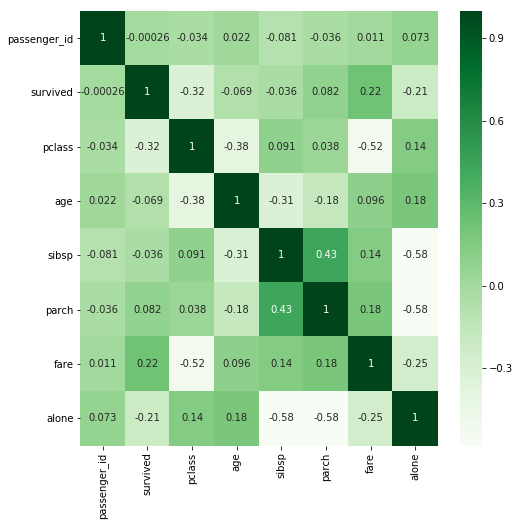

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(train_titanic.corr(), annot=True, cmap='Greens')


In [20]:
train_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
199,199,0,2,female,24.0,0,0,13.000,S,Second,Southampton,1
468,468,0,3,male,NaN,0,0,7.725,Q,Third,Queenstown,1
198,198,1,3,female,NaN,0,0,7.750,Q,Third,Queenstown,1
574,574,0,3,male,16.0,0,0,8.050,S,Third,Southampton,1
776,776,0,3,male,NaN,0,0,7.750,Q,Third,Queenstown,1


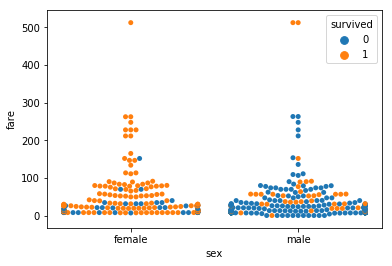

In [21]:
sns.swarmplot(data=train_titanic, x='sex', y='fare', hue='survived')